In [5]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
import warnings
warnings.filterwarnings("ignore")

In [6]:
key = os.environ.get('AZURE_SEARCH_KEY', '2752e8fd21a0460e8f1d4079688686ca')

In [7]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [8]:
results = search_images_bing(key, 'basketball players')
ims = results.attrgot('contentUrl')
len(ims)

150

In [9]:
ims[1]

'https://sportsshow.net/wp-content/uploads/2019/06/Best-Basketball-Players-2.jpg'

In [10]:
dest = 'images/grizzly.jpg'
download_url(ims[2], dest)

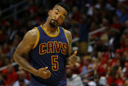

In [11]:
im = Image.open(dest)
im.to_thumb(128,128)

In [12]:
player_types = 'basketball', 'netball'
path = Path('players')

In [13]:
if not path.exists():
    path.mkdir()
    for o in player_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} players')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [14]:
fns = get_image_files(path)
fns

(#266) [Path('players/netball/00000043.jpg'),Path('players/netball/00000121.jpg'),Path('players/netball/00000003.jpg'),Path('players/netball/00000047.jpg'),Path('players/netball/00000085.jpg'),Path('players/netball/00000019.jpg'),Path('players/netball/00000061.jpg'),Path('players/netball/00000022.jpg'),Path('players/netball/00000021.jpg'),Path('players/netball/00000002.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#0) []

In [16]:
failed.map(Path.unlink);

In [17]:
players = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(128))

In [18]:
dls = players.dataloaders(path)

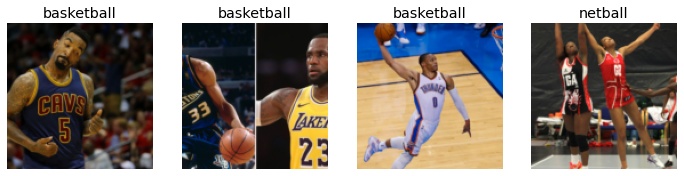

In [19]:
dls.valid.show_batch(max_n=4, nrows=1)

In [20]:
players = players.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                     batch_tfms=aug_transforms())
dls = players.dataloaders(path)

In [21]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.501451,3.395734,0.471698,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.810023,1.461689,0.603774,00:09
1,0.589890,0.566366,0.792453,00:08
2,0.478900,0.251229,0.886792,00:08
3,0.399815,0.196102,0.886792,00:08


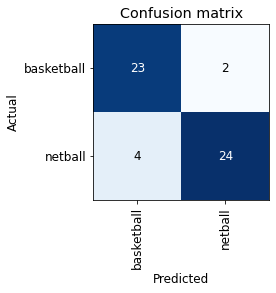

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

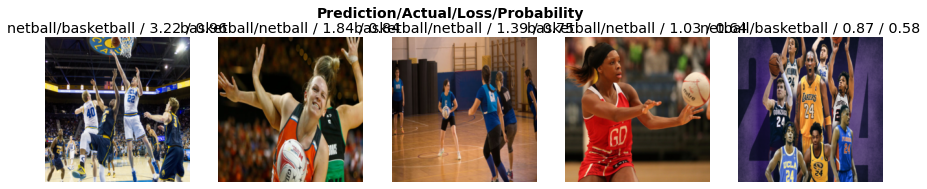

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [25]:
img = PILImage.create(btn_upload.data[-1])

In [26]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn.predict(img)

In [28]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: basketball; Probability: 0.7641')

In [49]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [50]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [51]:
btn_upload = widgets.FileUpload()

In [52]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])